* 23.10.2022
* Yaromir Kapustin
* v.01
---

# Цель

Не менее 20000 символов.
уменьшить размерность текста, используя метод главных компонент, при этом обеспечить сохранение информации не менее 80%


# Задачи:

- осуществить загрузку текста, токенизацию

- почистить данные (числа, знаки препинания, символы, стоп-слова)

- осуществить лемматизацию

- перевести в векторное представление

- применить метод главных компонент таким образом, чтобы потеря информации составила не более 20%

- (если есть метки классов) посчитать результаты обучения. 

# Датасет: http://ai.stanford.edu/~amaas/data/sentiment/

Набор из 25 000 высокополярных рецензий на фильмы для обучения и 25 000 для тестирования. Использовались положительные оценки тренировочного сета (12500 файлов)


In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
import string

In [11]:
os.chdir(r'C:\Users\Yaromir\Desktop\aclImdb\train\pos')

In [12]:
file_texts = []
for file_name in os.listdir():
    f = open(file_name, "r", encoding='utf-8')
    text = f.read()
    file_texts.append(text)

df = pd.DataFrame(file_texts, columns =['text'])

df

,text
0,Bromwell High is a cartoon comedy. It ran at t...
1,Homelessness (or Houselessness as George Carli...
2,Brilliant over-acting by Lesley Ann Warren. Be...
3,This is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...
...,...
12495,"Seeing as the vote average was pretty low, and..."
12496,"The plot had some wretched, unbelievable twist..."
12497,I am amazed at how this movie(and most others ...
12498,A Christmas Together actually came before my t...


##### Подготовка текста

In [13]:
#убираю пунутуацию
df = df['text'].str.replace('[^\w\s]','')

C:\Users\Yaromir\AppData\Local\Temp\ipykernel_4876\3275122920.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df['text'].str.replace('[^\w\s]','')


In [14]:
#убираю цифры
df = df.str.replace('\d+', '')

C:\Users\Yaromir\AppData\Local\Temp\ipykernel_4876\4116977913.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df = df.str.replace('\d+', '')


In [15]:
#привожу все к нижнему регистру
df = df.apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in string.punctuation]))

In [16]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [17]:
#убираю стопслова
stop_words = set(stopwords.words('english'))
df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [18]:
#лемматизация текста
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_lemmatized = df.apply(lemmatize_text)

In [19]:
df_lemmatized

0        [bromwell, high, cartoon, comedy, ran, time, p...
1        [homelessness, houselessness, george, carlin, ...
2        [brilliant, overacting, lesley, ann, warren, b...
3        [easily, underrated, film, inn, brook, cannon,...
4        [typical, mel, brook, film, much, le, slapstic...
                               ...                        
12495    [seeing, vote, average, pretty, low, fact, cle...
12496    [plot, wretched, unbelievable, twist, however,...
12497    [amazed, movieand, others, average, star, lowe...
12498    [christmas, together, actually, came, time, iv...
12499    [workingclass, romantic, drama, director, mart...
Name: text, Length: 12500, dtype: object

---

In [20]:
#из df в ndarray
all_tokens = df_lemmatized.to_numpy()
token_list = np.concatenate(all_tokens)
len(token_list)

1561305

In [21]:
cut_df = df_lemmatized[0:100]
all_tokens = cut_df.to_numpy()
token_list = np.concatenate(all_tokens)
len(token_list)

12281

##### Векторизация

In [22]:
vectorizer = TfidfVectorizer()

In [23]:
X = vectorizer.fit_transform(token_list)

In [24]:
print(X.shape)

(12281, 3893)


In [25]:
svd = TruncatedSVD(n_components=3115, n_iter=7, random_state=42)

In [26]:
svd.fit(X)

TruncatedSVD(n_components=3115, n_iter=7, random_state=42)

In [27]:
transformed = svd.transform(X)

In [28]:
transformed.shape

(12281, 3115)

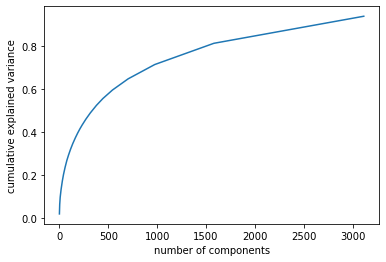

In [29]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
explained_variance = svd.explained_variance_ratio_
for i in range(0, 15):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 2.07% of variance
Component  1 accounts for 1.97% of variance
Component  2 accounts for 1.57% of variance
Component  3 accounts for 0.87% of variance
Component  4 accounts for 0.85% of variance
Component  5 accounts for 0.78% of variance
Component  6 accounts for 0.69% of variance
Component  7 accounts for 0.54% of variance
Component  8 accounts for 0.49% of variance
Component  9 accounts for 0.44% of variance
Component 10 accounts for 0.43% of variance
Component 11 accounts for 0.42% of variance
Component 12 accounts for 0.38% of variance
Component 13 accounts for 0.38% of variance
Component 14 accounts for 0.38% of variance


In [31]:
type(transformed)

numpy.ndarray

In [ ]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=transformed)

<AxesSubplot:>

C:\conda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
